# COSC2753 - Assignment 1 - Length of Stay Prediction 

**RMIT University Vietnam**

**Course:** COSC2753

**Name:** Pham Cong Minh

**ID:** s3818102

**Lecturer:** Dr. Duy Dang Pham Thien

**Submission Due Date:** 16 April 2021

Predict a patient will stay more than 3 days (class 1) or less (class 0)

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('dark_background')

## 2. Read train data & inspect

### 2.1 Read data

In [2]:
train_data = pd.read_csv('train_data.csv').drop(['ID', 'HealthServiceArea'], axis=1)

train_data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


### 2.2 Inspect data

In [3]:
train_data.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

In [5]:
train_data.shape

(59966, 14)

## 3. Data preprocessing and visualization

### 3.1 Convert LoS to binary targets

In [6]:
train_data['LengthOfStay'] = train_data['LengthOfStay'].apply(lambda x: 0 if int(x) <= 3 else 1)
train_data['LengthOfStay'].value_counts()

0    49895
1    10071
Name: LengthOfStay, dtype: int64

### 3.2 Deep inspection to consider anomaly data point(s)

In [7]:
for col in train_data.columns:
    print(col)
    count = train_data[col].value_counts()
    percent = train_data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'Counts': count, 'Percent': percent}))
    print('--------------------------------')

Gender
   Counts Percent
M   30978  51.66%
F   28987  48.34%
U       1    0.0%
--------------------------------
Race
                        Counts Percent
White                    32943  54.94%
Other Race               18314  30.54%
Black/African American    8183  13.65%
Multi-racial               526   0.88%
--------------------------------
TypeOfAdmission
           Counts Percent
Newborn     58741  97.96%
Emergency     659    1.1%
Urgent        412   0.69%
Elective      154   0.26%
--------------------------------
CCSProcedureCode
      Counts Percent
 228   19886  33.16%
 115   13628  22.73%
 0     11189  18.66%
 220   10773  17.97%
 231    2981   4.97%
-1       769   1.28%
 216     740   1.23%
--------------------------------
APRSeverityOfIllnessCode
   Counts Percent
1   47953  79.97%
2    8760  14.61%
3    3252   5.42%
4       1    0.0%
--------------------------------
PaymentTypology
                           Counts Percent
Medicaid                    28723   47.9%
Private He

### 3.3 Plot the attributes of class 0 and 1

In [8]:
def Facet_Grid_sns(df):
    for c in df.columns:
        g = sns.FacetGrid(df, col='LengthOfStay',height =4, aspect = 2)
        g.map(plt.hist, str(c) ,bins=20)
        g.set_axis_labels(c, "Count")

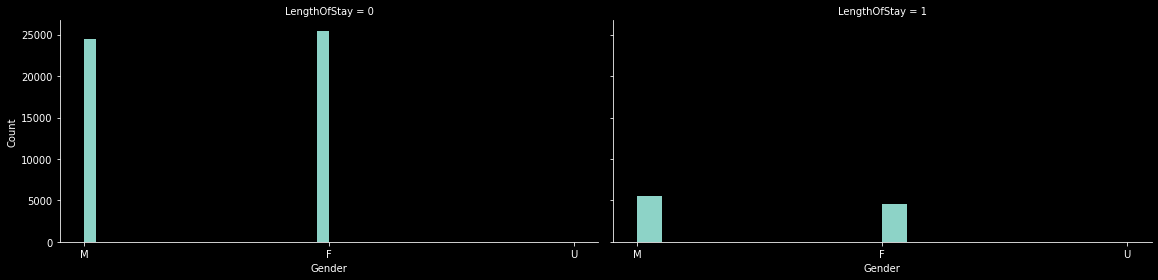

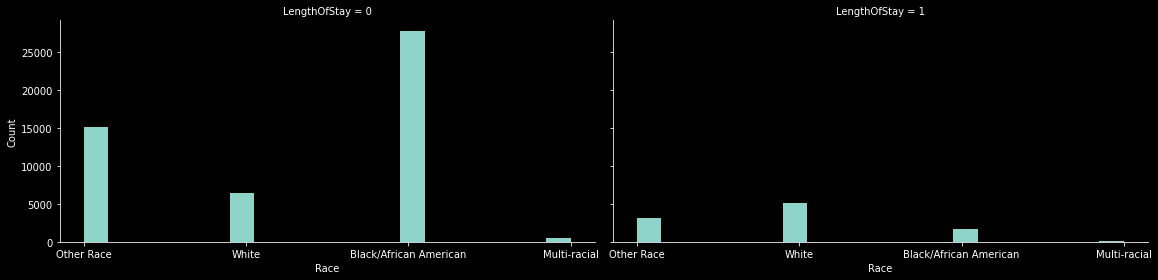

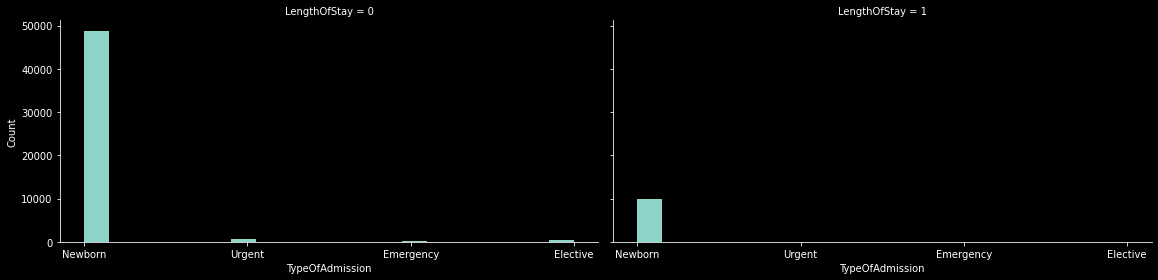

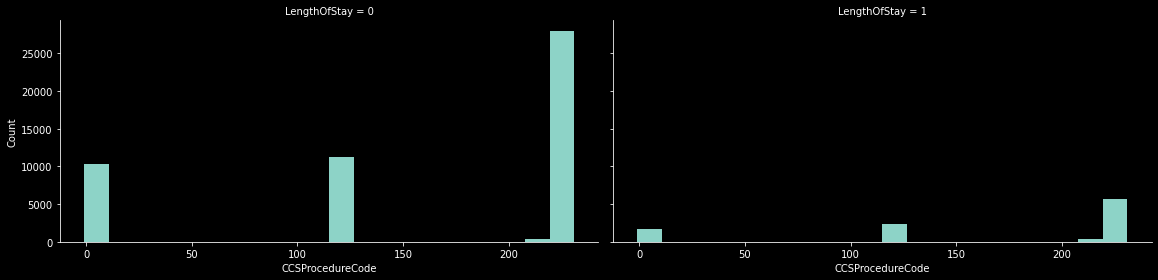

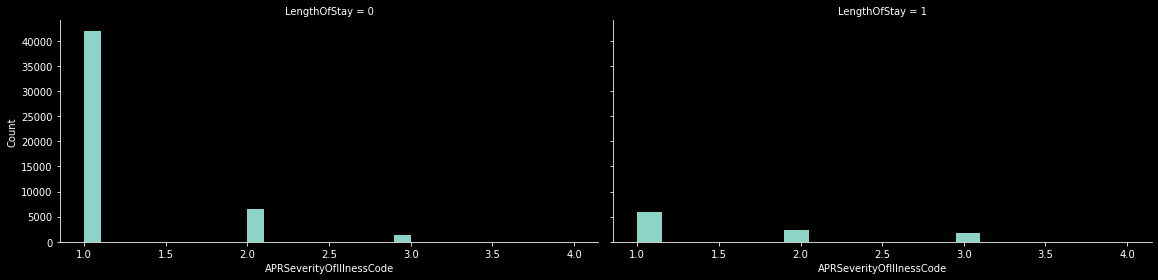

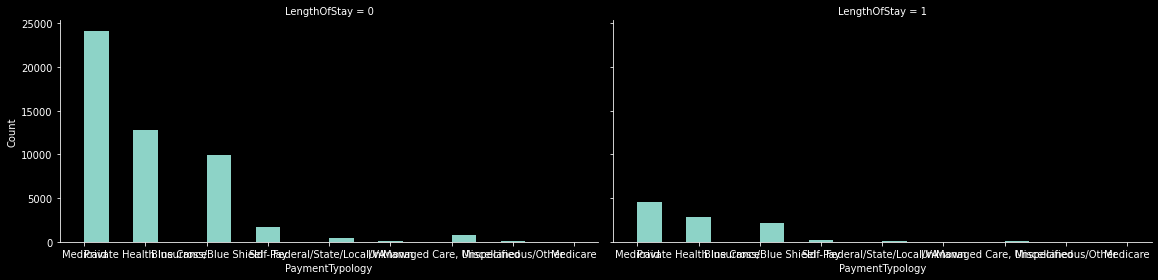

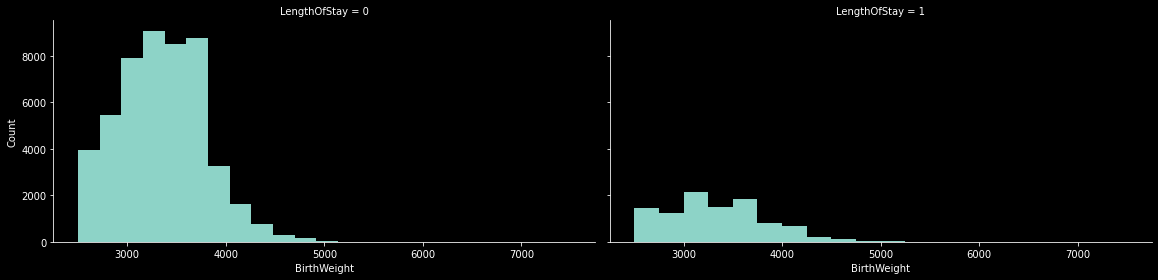

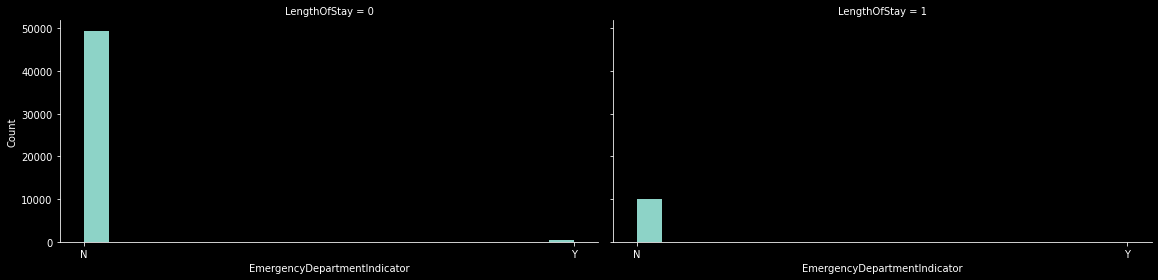

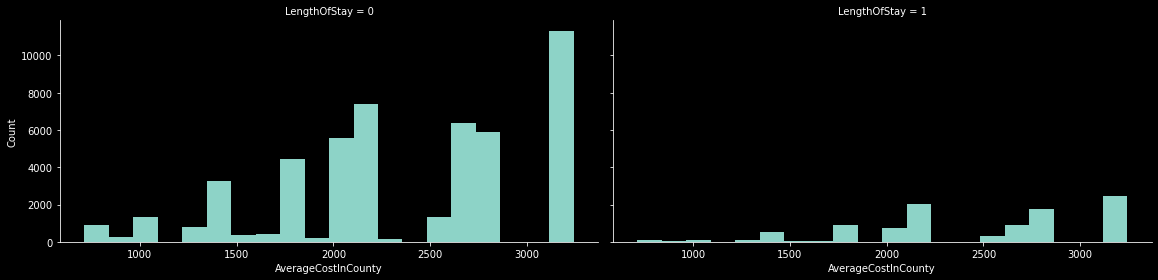

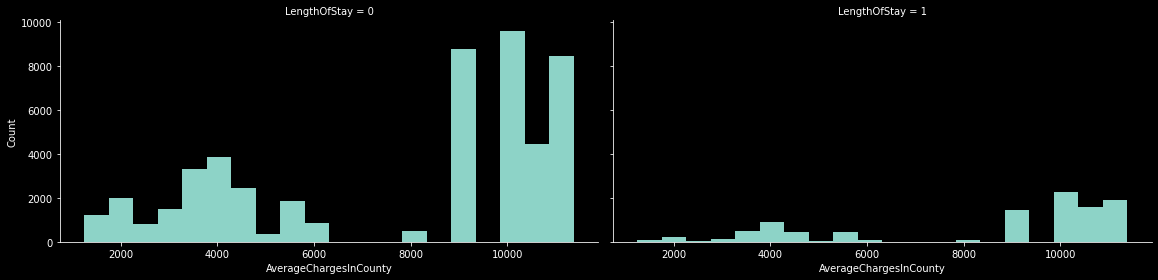

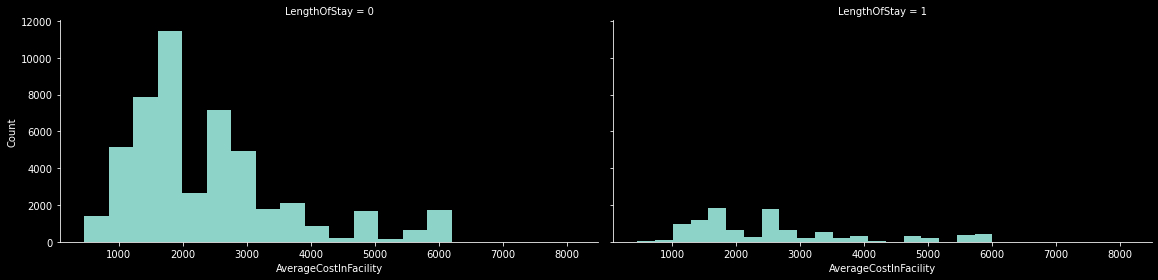

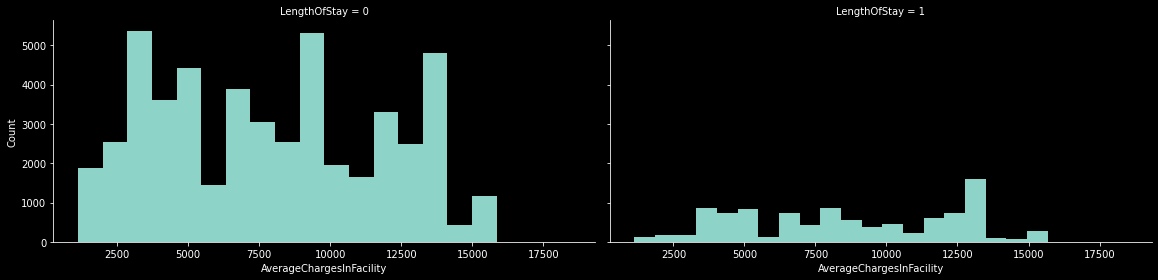

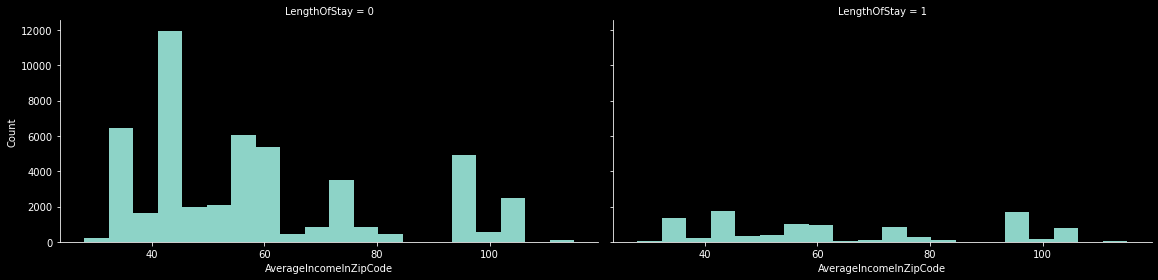

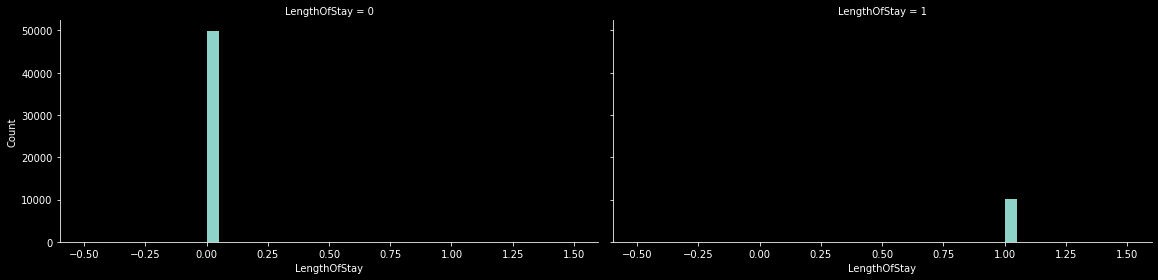

In [9]:
Facet_Grid_sns(train_data)

### 3.2 Split into X and y

In [10]:
X = train_data.drop('LengthOfStay', axis=1)
y = train_data['LengthOfStay']

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


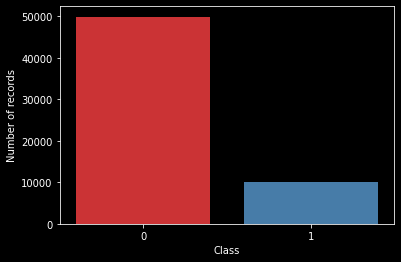

In [11]:
sns.countplot(y, palette='Set1')
plt.xlabel('Class')
plt.ylabel('Number of records')
plt.show()

## 4. Encode norminal data

### 4.1.  Using pd.get_dummies()

In [12]:
X_copy = X.copy()
encode_col = ['Gender', 
              'Race', 
              'TypeOfAdmission', 
              'CCSProcedureCode',
              'PaymentTypology', 
              'EmergencyDepartmentIndicator']

for col in encode_col:
    dummy = pd.get_dummies(X_copy[col])
    X_copy = pd.concat([X_copy, dummy], axis=1)
    X_copy = X_copy.drop(col, axis=1)

# Check X_copy
X_copy.columns

Index([ 'APRSeverityOfIllnessCode',               'BirthWeight',
             'AverageCostInCounty',    'AverageChargesInCounty',
           'AverageCostInFacility',  'AverageChargesInFacility',
          'AverageIncomeInZipCode',                         'F',
                               'M',                         'U',
          'Black/African American',              'Multi-racial',
                      'Other Race',                     'White',
                        'Elective',                 'Emergency',
                         'Newborn',                    'Urgent',
                                -1,                           0,
                               115,                         216,
                               220,                         228,
                               231,    'Blue Cross/Blue Shield',
          'Federal/State/Local/VA', 'Managed Care, Unspecified',
                        'Medicaid',                  'Medicare',
             'Miscellaneo

### 4.2. Drop outliner encoded-columns

### 4.1 Plot heatmap for correlations (encoded data)

<AxesSubplot:>

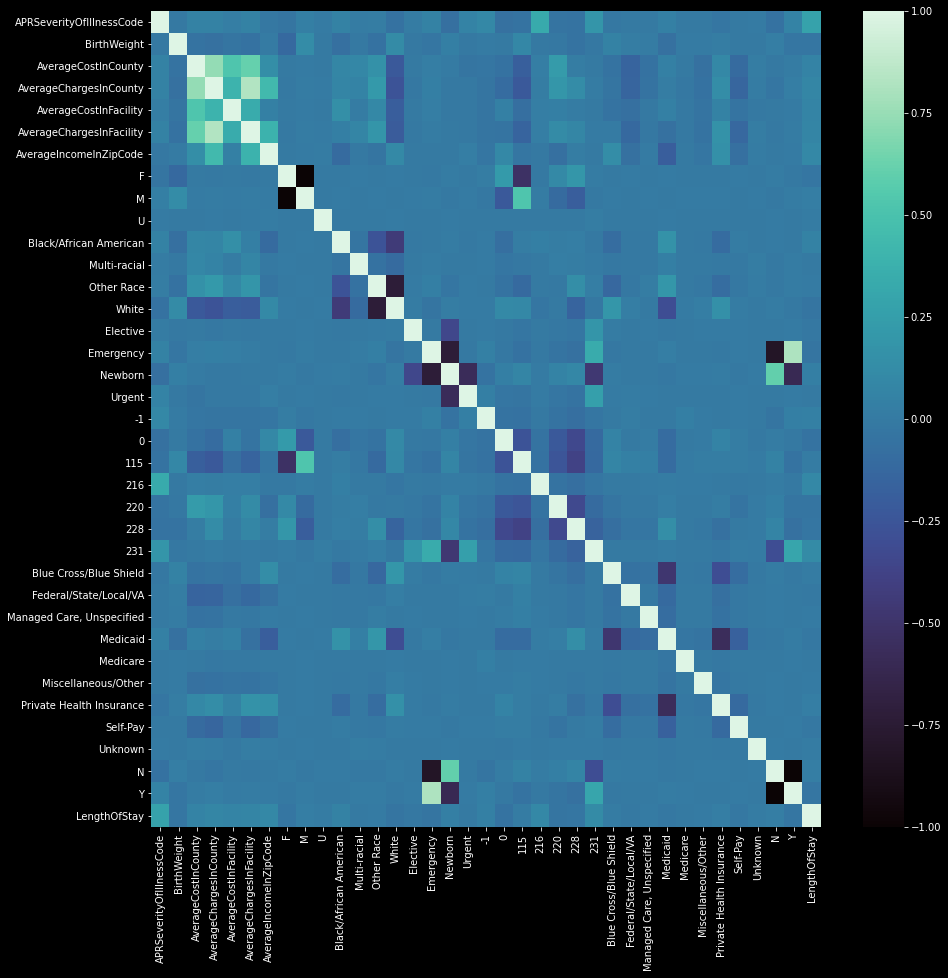

In [13]:
tmp = pd.concat([X_copy, y], axis=1)
correlations = tmp.corr()
fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(correlations, ax = ax, cmap ='mako')

## 5. Split data into training and testing set

### 5.1 Split dataset

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.25, random_state = 2, stratify = y)

In [15]:
X_train

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,U,...,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown,N,Y
30691,3,2600,3155,11381,2895,13394,45,1,0,0,...,0,0,1,0,0,0,0,0,1,0
50762,1,3900,2611,9227,3790,6250,45,1,0,0,...,0,0,1,0,0,0,0,0,1,0
29845,2,2700,1860,2846,1860,2846,53,1,0,0,...,0,0,0,0,0,0,0,0,1,0
21852,1,2600,2018,3610,2018,3610,52,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8701,1,3400,2777,1587,2777,1587,54,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,1,2600,3155,11381,3032,10135,115,1,0,0,...,0,0,0,0,0,1,0,0,1,0
34101,1,3500,1445,3419,1691,3761,36,0,1,0,...,0,0,1,0,0,0,0,0,1,0
11723,1,3600,1826,4190,1459,3505,55,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1274,1,3000,3155,11381,3032,10135,84,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### 5.2 Reset index

In [16]:
def df_reset_index(x):
    return x.reset_index().drop('index', axis = 1)

X_train = df_reset_index(X_train)
X_test = df_reset_index(X_test)
y_train = df_reset_index(y_train)
y_test = df_reset_index(y_test)

In [17]:
X_train

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,U,...,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown,N,Y
0,3,2600,3155,11381,2895,13394,45,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,3900,2611,9227,3790,6250,45,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2,2700,1860,2846,1860,2846,53,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,2600,2018,3610,2018,3610,52,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,3400,2777,1587,2777,1587,54,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44969,1,2600,3155,11381,3032,10135,115,1,0,0,...,0,0,0,0,0,1,0,0,1,0
44970,1,3500,1445,3419,1691,3761,36,0,1,0,...,0,0,1,0,0,0,0,0,1,0
44971,1,3600,1826,4190,1459,3505,55,0,1,0,...,0,0,1,0,0,0,0,0,1,0
44972,1,3000,3155,11381,3032,10135,84,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## 6. Scale data

### 6.1 StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)
y_train_ravel = y_train.values.ravel()

## 7. Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

### 7.1. Train model without optimization

In [64]:
logistic = LogisticRegression()
logistic.fit(X_train_transform, y_train_ravel)

LogisticRegression(C=1, solver='liblinear')

### 7.2. Classification report

In [66]:
y_pred_logistic = logistic.predict(X_test_transform)

print('Logistic Regression')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_logistic) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_logistic))

Logistic Regression
Accuracy: 84.17%
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     12474
           1       0.61      0.15      0.25      2518

    accuracy                           0.84     14992
   macro avg       0.73      0.57      0.58     14992
weighted avg       0.81      0.84      0.80     14992



### 7.3. Hyper-parameter tunning

#### 7.3.1. Global hyper-paremeter tunning

In [71]:
# Global hyper-parameter tunning function
def hyper_parameter_tunning(X_train, y_train, model, param_tuning):
    gsearch = GridSearchCV(estimator = model,
                           param_grid = param_tuning,                        
                           scoring = metrics.make_scorer(metrics.f1_score),  
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

#### 7.3.2 Find best parameters for optimization

In [72]:
# Only run once for best parameters
log__reg_params = {'penalty': ['l1', 'l2', 'elasticnet'], 
               'C': [0.001,0.01,0.1,1,10,100,1000],
                'max_iter': [100,250,500,1000],
               'solver': ['liblinear', 'saga','lbfgs']}

log_reg_model = LogisticRegression()

hyper_parameter_tunning(X_train_transform, y_train_ravel,log_reg_model, log__reg_params)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.0005291  0.                nan 0.21660018 0.17550021 0.17550021
        nan        nan        nan 0.0005291  0.                nan
 0.21660018 0.17550021 0.17550021        nan        nan        nan
 0.0005291  0.                nan 0.21660018 0.17550021 0.17550021
        nan        nan        nan 0.0005291  0.                nan
 0.21660018 0.17550021 0.17550021        nan        nan        nan
 0.20472049 0.20128869        nan 0.21962075 0.21539374 0.21496474
        nan        nan        nan 0.20472049 0.20109202        nan
 0.21962075 0.2151788  0.21496474        nan        nan        nan
 0.20472049 0.20109202        nan 0.21962075 0.2151788  0.21496474
        nan        nan        nan 0.20472049 0.20109202        nan
 0.21962075 0.2151788  0.21496474        nan        nan        nan
 0.21741868 0.21729912        nan 0.21987013 0.2191567

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

#### 7.3.3. Train model with best parameters

In [ ]:
logistic_op = LogisticRegression(C= 1, max_iter= 100, penalty= 'l2', solver= 'liblinear')
logistic_op.fit(X_train_transform, y_train_ravel)

#### 7.3.4. Classification report with optimization

In [ ]:
y_pred_logistic_op = logistic_op.predict(X_test_transform)

print('Logistic Regression')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_logistic_op) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_logistic_op))

## 8. Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train_ravel)

GaussianNB()

In [22]:
y_pred_naive = gnb.predict(X_test)

print('Naive Bayes')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_naive) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_naive))

Naive Bayes
Accuracy: 82.28%
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12474
           1       0.46      0.33      0.39      2518

    accuracy                           0.82     14992
   macro avg       0.67      0.63      0.64     14992
weighted avg       0.80      0.82      0.81     14992



## 9. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
y_pred_tree = clf.predict(X_test)

print('Decision Tree')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_tree) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_tree))

Decision Tree
Accuracy: 78.86%
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     12474
           1       0.35      0.29      0.32      2518

    accuracy                           0.79     14992
   macro avg       0.60      0.59      0.60     14992
weighted avg       0.78      0.79      0.78     14992



## 10. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

DecisionTreeClassifier(criterion='entropy')

### 10.1. Hyper-parameter tunning

In [ ]:
# Only run once for best parameters
RF_params = {'n_estimators' : [100, 300, 500, 800, 1200],
             'max_depth' : [5, 8, 15, 25, 30],
             'min_samples_split' : [2, 5, 10, 15, 100],
             'min_samples_leaf' : [1, 2, 5, 10],
            'criterion': ['gini','entropy'],
            'bootstrap': [True, False]}

RF_model = RandomForestClassifier()

hyper_parameter_tunning(X_train,y_train,RF_model, RF_params)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


### 10.2. Train the model with best parameters

In [77]:
RF_clf = RandomForestClassifier(criterion='entropy', max_depth=None)
RF_clf.fit(X_train, y_train_ravel)

RandomForestClassifier(criterion='entropy')

In [78]:
y_pred_forest = RF_clf.predict(X_test)

print('Random Forest')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_forest) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_forest))

Random Forest
Accuracy: 81.43%
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     12474
           1       0.42      0.27      0.33      2518

    accuracy                           0.81     14992
   macro avg       0.64      0.60      0.61     14992
weighted avg       0.79      0.81      0.80     14992



## 11. XGBoost

In [ ]:
# Install xgboost library

!pip install xgboost

In [27]:
from xgboost import XGBClassifier

### 11.1. Hyper-parameter tunning

In [28]:
# XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
      "objective" : ["binary:logistic"]}

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = make_scorer(f1_score),  
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [29]:
# Only run once for best parameters
# hyperParameterTuning(X_train,y_train_ravel)

### 11.2. Train model with the best parameters

In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.05, max_depth = 8, min_child_weight = 3, gamma=  0.2, colsample_bytree =0.4, objective = 'binary:logistic')
# learning_rate = 0.05, max_depth = 8, min_child_weight = 3, gamma=  0.2, colsample_bytree =0.4, objective = 'binary:logistic'
# learning_rate = 0.1, max_depth = 7, min_child_weight = 5, gamma=  0.0, colsample_bytree =0.4, objective = 'binary:logistic'
xgb.fit(X_train, y_train_ravel)

[21:41:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 11.3. Classification report

In [31]:
y_xgb = xgb.predict(X_test)

print('XGBoostClassifier')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_xgb) * 100, 2)))
print(metrics.classification_report(y_test, y_xgb))

XGBoostClassifier
Accuracy: 84.72%
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     12474
           1       0.70      0.16      0.26      2518

    accuracy                           0.85     14992
   macro avg       0.78      0.57      0.59     14992
weighted avg       0.83      0.85      0.80     14992



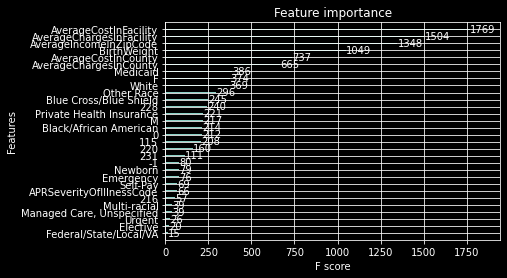

<Figure size 3600x3600 with 0 Axes>

In [32]:
from xgboost import plot_importance

plot_importance(xgb, max_num_features = 30)
plt.figure(figsize=(50,50))
plt.show()

## 12 Apply on Test dataset

In [33]:
test_data = pd.read_csv("test_data.csv")
submission = pd.DataFrame(columns=['ID','LengthOfStay'])
submission['ID'] = test_data['ID']
test_data = test_data.drop(['ID','HealthServiceArea'], axis = 1)

test_data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74
3,M,Other Race,Newborn,228,1,Medicaid,3300,N,2611,9227,3790,6250,45
4,F,Other Race,Newborn,220,2,Medicaid,3800,N,3155,11381,3032,10135,59


In [34]:
for col in test_data.columns:
    print(col)
    count = test_data[col].value_counts()
    percent = test_data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'Counts': count, 'Percent': percent}))
    print('--------------------------------')

Gender
   Counts Percent
M   35471  51.28%
F   33704  48.72%
U       2    0.0%
--------------------------------
Race
                        Counts Percent
White                    30432  43.99%
Other Race               27043  39.09%
Black/African American   10780  15.58%
Multi-racial               922   1.33%
--------------------------------
TypeOfAdmission
           Counts Percent
Newborn     68125  98.48%
Emergency     495   0.72%
Urgent        362   0.52%
Elective      194   0.28%
Trauma          1    0.0%
--------------------------------
CCSProcedureCode
      Counts Percent
 228   24212   35.0%
 0     15120  21.86%
 220   13108  18.95%
 115   12819  18.53%
 231    2535   3.66%
 216     764    1.1%
-1       619   0.89%
--------------------------------
APRSeverityOfIllnessCode
   Counts Percent
1   55243  79.86%
2   10935  15.81%
3    2998   4.33%
4       1    0.0%
--------------------------------
PaymentTypology
                           Counts Percent
Medicaid                  

In [35]:
test_copy = test_data.copy()
# encode_col = ['Gender', 
#               'Race', 
#               'TypeOfAdmission', 
#               'CCSProcedureCode',
#               'PaymentTypology', 
#               'EmergencyDepartmentIndicator']
test_copy['PaymentTypology'] = test_copy['PaymentTypology'].replace(to_replace ="Department of Corrections", value = "Unknown")


for col in encode_col:
    dummy = pd.get_dummies(test_copy[col])
    test_copy = pd.concat([test_copy, dummy], axis=1)
#     if col == 'TypeOfAdmission':
#         missing_type = ["Trauma","Not Available"]
#         for t in missing_type:
#             if t not in test_copy.columns:
#                 test_copy[t] = 0
#         test_copy = test_copy.drop(col, axis=1)
#     else:
    test_copy = test_copy.drop(col, axis=1)

test_copy = test_copy.drop(['Trauma'], axis = 1)
# Check X_copy
test_copy.columns

Index([ 'APRSeverityOfIllnessCode',               'BirthWeight',
             'AverageCostInCounty',    'AverageChargesInCounty',
           'AverageCostInFacility',  'AverageChargesInFacility',
          'AverageIncomeInZipCode',                         'F',
                               'M',                         'U',
          'Black/African American',              'Multi-racial',
                      'Other Race',                     'White',
                        'Elective',                 'Emergency',
                         'Newborn',                    'Urgent',
                                -1,                           0,
                               115,                         216,
                               220,                         228,
                               231,    'Blue Cross/Blue Shield',
          'Federal/State/Local/VA', 'Managed Care, Unspecified',
                        'Medicaid',                  'Medicare',
             'Miscellaneo

In [36]:
test_transform = scaler.transform(test_copy)

pred_xgb = xgb.predict(test_copy)
pred_log = logistic.predict(test_transform)

pred_xgb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
u,c = np.unique(pred_xgb, return_counts = True)
u1,c1 = np.unique(pred_log, return_counts = True)
print(dict(zip(u,c)))
print(dict(zip(u1,c1)))

{0: 68026, 1: 1151}
{0: 66902, 1: 2275}


In [38]:
# submission['LengthOfStay'] = pd.Series(pred_xgb)

# submission.to_csv('test_xgb_3.csv',index=False)